## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [8]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [9]:
df = pd.read_csv('data/human_body_temperature.csv')

Question 1: Is the distribution of body temperatures normal?

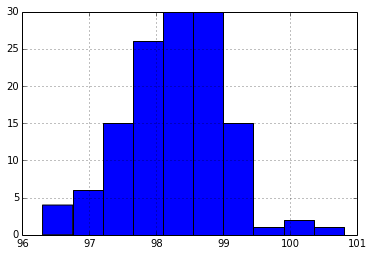

In [10]:
df.temperature.hist()

It looks a bit skewed from the histogram, but otherwise normal. I am making a qqplot to get a better sense.

((array([-2.55445479, -2.22902648, -2.0419783 , -1.90719589, -1.80015121,
         -1.71047373, -1.63275826, -1.56381343, -1.50159038, -1.44469181,
         -1.39212017, -1.3431372 , -1.29718048, -1.2538112 , -1.21268003,
         -1.17350409, -1.13605091, -1.10012698, -1.06556939, -1.03223961,
         -1.00001877, -0.96880405, -0.93850586, -0.90904562, -0.88035396,
         -0.85236935, -0.82503685, -0.79830725, -0.77213622, -0.74648367,
         -0.72131321, -0.69659166, -0.67228871, -0.64837651, -0.62482945,
         -0.60162387, -0.57873784, -0.55615102, -0.53384444, -0.51180041,
         -0.49000234, -0.46843466, -0.44708273, -0.42593273, -0.40497157,
         -0.38418687, -0.36356684, -0.34310027, -0.32277642, -0.30258504,
         -0.28251629, -0.2625607 , -0.24270913, -0.22295275, -0.20328303,
         -0.18369165, -0.16417053, -0.14471177, -0.12530767, -0.10595063,
         -0.08663321, -0.06734807, -0.04808795, -0.02884566, -0.00961403,
          0.00961403,  0.02884566,  0.

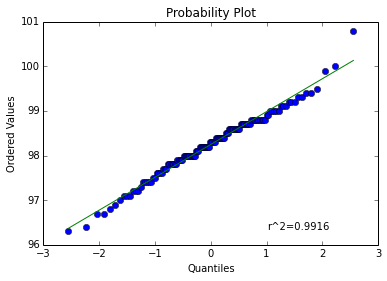

In [11]:
stats.probplot(df.temperature, dist="norm", plot=plt)

The ordered values are on the unity line with the theoretical quantiles. The distribution of body temperatures in this data set appears normal.

Question 2: Is the true population mean really 98.6 degrees F?
We do not know the population standard deviation, but we have enough samples (>30) to estimate the population standard deviation. With a sample larger than 30 and knowledge of the true population standard deviation, a z-statistic is appropriate. 

In [15]:
#Single sample Student's t-test
t_stat = (df.temperature.mean() - 98.6) / (df.temperature.std() / (float(df.temperature.size) ** 0.5))
t_stat

-5.4548232924008921

In [16]:
#Look up the p-value
pval = stats.t.sf(np.abs(t_stat), df.temperature.size-1)*2
pval

2.410632041155355e-07

The p-value is quite small in this case (pval < 0.0001). It is very unlikely to have observed these data, given a true population mean of 98.6. Therefore, we may reject the null hypothesis that the mean body temperature of the population is 98.6.

Question 3: At what temperature should we consider someone's temperature to be "abnormal"?
I will consider a temperature outside of the 95% confidence interval to be abnormal.

In [18]:
#Calculate a margin of error
#z* is ~1.96 for a 95% confidence interval
me = 1.96 * (df.temperature.std() / (float(df.temperature.size) ** 0.5))
me

0.12603665700141578

In [19]:
low_ci = df.temperature.mean() - me
low_ci

98.123194112229356

In [20]:
high_ci = df.temperature.mean() + me
high_ci

98.375267426232199

By this metric, a temperature below 98.12 or above 98.38 is abnormal.

Question 4: Is there a significant difference between males and females in normal temperature?
First, I will check that both distributions have the same n

In [22]:
male = df[df.gender == 'M']
female = df[df.gender == 'F']

In [30]:
male.temperature.size

65

In [31]:
female.temperature.size

65

Now I will check if they are both normal

((array([-2.3041488 , -1.9474555 , -1.73875672, -1.58628365, -1.46371296,
         -1.35987397, -1.26892666, -1.1874133 , -1.11310799, -1.04448844,
         -0.98046451, -0.92022672, -0.86315599, -0.8087671 , -0.75667176,
         -0.70655357, -0.65815059, -0.61124291, -0.56564343, -0.52119116,
         -0.47774596, -0.4351846 , -0.39339758, -0.35228669, -0.31176295,
         -0.271745  , -0.23215772, -0.1929311 , -0.15399923, -0.11529947,
         -0.07677169, -0.03835758,  0.        ,  0.03835758,  0.07677169,
          0.11529947,  0.15399923,  0.1929311 ,  0.23215772,  0.271745  ,
          0.31176295,  0.35228669,  0.39339758,  0.4351846 ,  0.47774596,
          0.52119116,  0.56564343,  0.61124291,  0.65815059,  0.70655357,
          0.75667176,  0.8087671 ,  0.86315599,  0.92022672,  0.98046451,
          1.04448844,  1.11310799,  1.1874133 ,  1.26892666,  1.35987397,
          1.46371296,  1.58628365,  1.73875672,  1.9474555 ,  2.3041488 ]),
  array([ 96.3,  96.7,  96.9,  97. ,

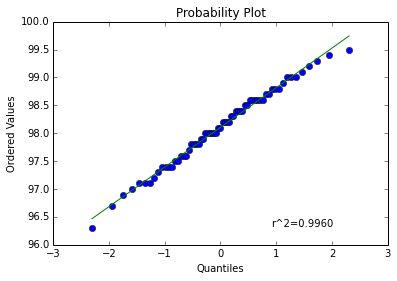

In [27]:
stats.probplot(male.temperature, dist="norm", plot=plt)

((array([-2.3041488 , -1.9474555 , -1.73875672, -1.58628365, -1.46371296,
         -1.35987397, -1.26892666, -1.1874133 , -1.11310799, -1.04448844,
         -0.98046451, -0.92022672, -0.86315599, -0.8087671 , -0.75667176,
         -0.70655357, -0.65815059, -0.61124291, -0.56564343, -0.52119116,
         -0.47774596, -0.4351846 , -0.39339758, -0.35228669, -0.31176295,
         -0.271745  , -0.23215772, -0.1929311 , -0.15399923, -0.11529947,
         -0.07677169, -0.03835758,  0.        ,  0.03835758,  0.07677169,
          0.11529947,  0.15399923,  0.1929311 ,  0.23215772,  0.271745  ,
          0.31176295,  0.35228669,  0.39339758,  0.4351846 ,  0.47774596,
          0.52119116,  0.56564343,  0.61124291,  0.65815059,  0.70655357,
          0.75667176,  0.8087671 ,  0.86315599,  0.92022672,  0.98046451,
          1.04448844,  1.11310799,  1.1874133 ,  1.26892666,  1.35987397,
          1.46371296,  1.58628365,  1.73875672,  1.9474555 ,  2.3041488 ]),
  array([  96.4,   96.7,   96.8,   9

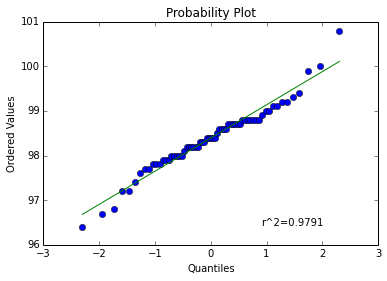

In [28]:
stats.probplot(female.temperature, dist="norm", plot=plt)

Both seem to be normally distributed, so we can proceed with a t-test.

In [34]:
mean_diff = male.temperature.mean() - female.temperature.mean()
pooled_std = ((male.temperature.std() ** 2) + (female.temperature.std() ** 2)) ** 0.5
n = float(female.temperature.size)
t_stat = mean_diff / (pooled_std * ((1 / n) ** 0.5))
t_stat

-2.2854345381652541

In [35]:
pval = stats.t.sf(np.abs(t_stat), male.temperature.size-1)*2
pval

0.025609613391863906

In [36]:
male.temperature.mean()

98.1046153846154

In [37]:
female.temperature.mean()

98.393846153846127

The p-value is less that 0.05, so, at that level, we can reject the null hypothesis that males and females have the same body temperature. Instead, it appears that females have a slightly higher body temperature than males.